### Libs

#### Installs

In [1]:
# !pip install wordcloud
# !pip install emoji
# !pip install regex
# !pip install imblearn

#### Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import nltk

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Análise exploratória

#### Base de teste

In [3]:
colnames = ['review']
df_test = pd.read_csv('archive/dataset_test.csv', names=colnames, header=None)

df_test.shape

(175678, 1)

In [4]:
df_test.head()

,review
0,"Na hora de comprar é tudo uma maravilha, só qu..."
1,"A loja é feita de ""Flanders"". Todo mundo simpá..."
2,Quer ser atendido por um vendedor nota 10? Pro...
3,Loja SEMPRE cheia. Tenha paciência ou resolva ...
4,Nunca fui atendida tão rápido e tão bem em uma...


In [5]:
df_test['review'][2]

'Quer ser atendido por um vendedor nota 10? Procure o Diego na Vivo Shop. Eldorado! Acabou de me vender um Sansung NOTE!'

#### Cenário 1

In [6]:
train_1 = pd.read_csv('archive/tips_scenario1_train.csv',',')

print(train_1.shape)
train_1.head()

(1714, 2)


,texto,rotulo
0,"A comida é deliciosa, mas pedi limonada suiça ...",-1.0
1,A partir desta sexta feira dia 11 começam a ab...,0.0
2,Joint burguer e brewdog,0.0
3,Agora de segunda a sexta o Habanero vai abrir ...,0.0
4,"Experimente o drink ""Dona Diabla"". Muito bom!",1.0


In [7]:
#### tem nulos?
train_1[pd.isnull(train_1['rotulo']) == True]

,texto,rotulo
64,NaN,NaN
102,NaN,NaN
129,NaN,NaN
173,NaN,NaN
183,NaN,NaN
195,NaN,NaN


In [8]:
### exclui dados nulos
train_1 = train_1[pd.isnull(
    train_1['rotulo']) != True].reset_index().drop(
    columns = ['index'])

In [9]:
### tem duplicados?
train_1[train_1.duplicated() == True].shape

(11, 2)

In [10]:
### drop duplicates
train_1 = train_1.drop_duplicates().reset_index().drop(columns = ['index'])
train_1.shape

(1697, 2)

In [11]:
df_sentiment = pd.DataFrame()

df_sentiment['sentiment'] = train_1['rotulo'].replace({-1 : 'negative'})
df_sentiment['sentiment'] = df_sentiment['sentiment'].replace({0 : 'neuter'})
df_sentiment['sentiment'] = df_sentiment['sentiment'].replace({1 : 'positive'})

fig = px.histogram(df_sentiment, x="sentiment")

fig.update_traces(marker_color="pink")

fig.update_layout(title_text='Sentiment Distribution')
fig.show()

**Quantidade de caractéres**

In [12]:
def len_str(text):
    
    len_txt = []
    
    for i in text:
        
        length = len(i)
        len_txt.append(length)
    
    return len_txt

In [13]:
train_1['qt_char_txt'] = len_str(train_1['texto'])

In [14]:
df_classes = train_1.groupby(['rotulo'], as_index = False).agg({'texto':'count', 
                                                                'qt_char_txt':'mean'})
df_classes['total'] = df_classes['texto'].sum()
df_classes['qt_char_txt'] = round(df_classes['qt_char_txt'], 2)
df_classes['perc_rotulo'] = round(df_classes['texto']/df_classes['total'], 2)
df_classes = df_classes.rename(columns = {'texto':'qt_txts', 
                                          'qt_char_txt':'qt_mean_char_txt'})


df_classes

,rotulo,qt_txts,qt_mean_char_txt,total,perc_rotulo
0,-1.0,411,127.19,1697,0.24
1,0.0,132,94.58,1697,0.08
2,1.0,1154,117.49,1697,0.68


Cenário 1 possui 3 classificações:
* 1 = positivo
* -1 = negativo
* 0 = neutro

**Obs:**
* Tamanho da Amostra 1697
* Amostra desbalanceada
* Maior parte dos reviews é positivo (68%)

* Reviews negativos em média são maiores (10 char a mais que os positivos)

#### Cenário 2

In [15]:
train_2 = pd.read_csv('archive/tips_scenario2_train.csv',',')
train_2.shape

(1788, 2)

In [16]:
train_2.head()

,texto,rotulo
0,"A comida é deliciosa, mas pedi limonada suiça ...",-1
1,A partir desta sexta feira dia 11 começam a ab...,-1
2,Joint burguer e brewdog,-1
3,Agora de segunda a sexta o Habanero vai abrir ...,-1
4,"Experimente o drink ""Dona Diabla"". Muito bom!",-1


In [17]:
train_2.groupby(['rotulo'], as_index = False).agg({'texto':'count'})

,rotulo,texto
0,-1,886
1,1,902


In [18]:
### Tem nulos?
train_2[pd.isnull(train_2['rotulo']) == True]

,texto,rotulo


In [19]:
### tem duplicados?
train_2[train_2.duplicated() == True].shape

(13, 2)

In [20]:
### drop duplicates
train_2 = train_2.drop_duplicates().reset_index().drop(columns = ['index'])
train_2.shape

(1775, 2)

In [21]:
df_sentiment_2 = pd.DataFrame()

df_sentiment_2['sentiment'] = train_2['rotulo'].replace({-1 : 'negative'})
df_sentiment_2['sentiment'] = df_sentiment_2['sentiment'].replace({1 : 'positive'})

fig = px.histogram(df_sentiment_2, x="sentiment")

fig.update_traces(marker_color="turquoise")

fig.update_layout(title_text='Rótulos Reviews')
fig.show()

In [22]:
train_2['qt_char_txt'] = len_str(train_2['texto'])

In [23]:
df_classes_2 = train_2.groupby(['rotulo'], as_index = False).agg({'texto':'count', 
                                                                'qt_char_txt':'mean'})
df_classes_2['total'] = df_classes_2['texto'].sum()
df_classes_2['qt_char_txt'] = round(df_classes_2['qt_char_txt'], 2)
df_classes_2['perc_rotulo'] = round(df_classes_2['texto']/df_classes_2['total'], 2)
df_classes_2 = df_classes_2.rename(columns = {'texto':'qt_txts', 
                                          'qt_char_txt':'qt_mean_char_txt'})


df_classes_2

,rotulo,qt_txts,qt_mean_char_txt,total,perc_rotulo
0,-1,874,130.39,1775,0.49
1,1,901,106.94,1775,0.51


Cenário 2 possui 2 classificações:
* 1 = positivo
* -1 = negativo

**Obs**
* Tamanho da amostra: 1775
* Amostra balanceada
* Reviews negativos em média tem 24 caractéres a mais

**Reviews distintos entre cenário 1 e 2**

In [24]:
print("Cenário 2 tem {} observaçõess a mais que o cenário 1.".format(train_2.shape[0] - train_1.shape[0]))

Cenário 2 tem 78 observaçõess a mais que o cenário 1.


In [25]:
print('{} reviews distintos'.format(len(set(list(train_2['texto'])) - set(list(train_1['texto'])))))

105 reviews distintos


### Pré-processamento de dados

1. Limpa pontuação do texto
2. Elimina case-sensitive problems
3. Elimina números

In [26]:
def clean_txt_data(df, col):
    
    """[Limpa string eliminando pontuação, elimina números 
        e transformando todos os caracteres em minúsculo.]
    
    Arguments:
        [df] {dataframe} -- [dataframe que será aplicado.]
        [col] {str} -- [coluna contendo os reviews para aplicação.]
        
        return:
            list_processed {list} -- [lista com texto processado.]
    """

    import string

    list_texts = list(df[col])
    list_processed = []

    list_words_array = []

    deletechars = string.punctuation
    translator = str.maketrans('', '', deletechars)

    for txt in list_texts:

        if pd.isnull(txt):
            list_processed.append(txt)
            list_words_array.append(txt)
        else:
            ### clean punctuation
            text_without_punct = txt.translate(translator)

            ### lower case
            text_lower = text_without_punct.lower()
            
            ### exclui números
            result = ''.join([i for i in text_lower if not i.isdigit()])
            list_processed.append(result)
            
    return list_processed

In [27]:
### aplica clean_txt_data na base de treino e na base de teste
train_1['review'] = clean_txt_data(train_1, 'texto')
train_2['review'] = clean_txt_data(train_2, 'texto')

In [28]:
print(train_1.head())
train_2.head()

                                               texto  rotulo  qt_char_txt  \
0  A comida é deliciosa, mas pedi limonada suiça ...    -1.0          166   
1  A partir desta sexta feira dia 11 começam a ab...     0.0          170   
2                            Joint burguer e brewdog     0.0           23   
3  Agora de segunda a sexta o Habanero vai abrir ...     0.0           92   
4      Experimente o drink "Dona Diabla". Muito bom!     1.0           45   

                                              review  
0  a comida é deliciosa mas pedi limonada suiça e...  
1  a partir desta sexta feira dia  começam a abri...  
2                            joint burguer e brewdog  
3  agora de segunda a sexta o habanero vai abrir ...  
4          experimente o drink dona diabla muito bom  


,texto,rotulo,qt_char_txt,review
0,"A comida é deliciosa, mas pedi limonada suiça ...",-1,166,a comida é deliciosa mas pedi limonada suiça e...
1,A partir desta sexta feira dia 11 começam a ab...,-1,170,a partir desta sexta feira dia começam a abri...
2,Joint burguer e brewdog,-1,23,joint burguer e brewdog
3,Agora de segunda a sexta o Habanero vai abrir ...,-1,92,agora de segunda a sexta o habanero vai abrir ...
4,"Experimente o drink ""Dona Diabla"". Muito bom!",-1,45,experimente o drink dona diabla muito bom


#### Stopwords

In [29]:
from nltk.corpus import stopwords

stop_wordstk = stopwords.words('portuguese')

In [30]:
### Selecionadas
stop_words = ['de', 'a', 'á', 'à', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'como',
              'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'das','ela','ele',
              'à','seu', 'sua', 'ou',  'nos', 'já', 'la','lá', 'ali', 'aqui',
              'eu','seus', 'quem', 'nas', 'vosso','abrahão',
              'me', 'esse', 'eles', 'você','essa', 'num', 'suas', 'meu', 'às', 'minha', 
              'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses',
              'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes','meus', 'minhas',
              'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 
              'delas', 'ma']

print("Das {} stopwords do toolkit mantive apenas {}".format(len(stop_wordstk), len(stop_words)))

Das 204 stopwords do toolkit mantive apenas 83


In [31]:
def remove_stop_words(df, col, stopwords):
    
    removed_stop_words = []
    
    reviews = list(df[col])
    
    for txt in reviews:
              
        removed_stop_words.append(
            ' '.join([word for word in txt.split() 
                      if word not in stopwords])
        )

    return removed_stop_words

In [32]:
train_1['clean_review'] = remove_stop_words(train_1, 'review', stop_words)
train_2['clean_review'] = remove_stop_words(train_2, 'review', stop_words)

In [33]:
print(train_1.head())
train_2.head()

                                               texto  rotulo  qt_char_txt  \
0  A comida é deliciosa, mas pedi limonada suiça ...    -1.0          166   
1  A partir desta sexta feira dia 11 começam a ab...     0.0          170   
2                            Joint burguer e brewdog     0.0           23   
3  Agora de segunda a sexta o Habanero vai abrir ...     0.0           92   
4      Experimente o drink "Dona Diabla". Muito bom!     1.0           45   

                                              review  \
0  a comida é deliciosa mas pedi limonada suiça e...   
1  a partir desta sexta feira dia  começam a abri...   
2                            joint burguer e brewdog   
3  agora de segunda a sexta o habanero vai abrir ...   
4          experimente o drink dona diabla muito bom   

                                        clean_review  
0  comida deliciosa mas pedi limonada suiça disse...  
1  partir desta sexta feira dia começam abrir jan...  
2                              join

,texto,rotulo,qt_char_txt,review,clean_review
0,"A comida é deliciosa, mas pedi limonada suiça ...",-1,166,a comida é deliciosa mas pedi limonada suiça e...,comida deliciosa mas pedi limonada suiça disse...
1,A partir desta sexta feira dia 11 começam a ab...,-1,170,a partir desta sexta feira dia começam a abri...,partir desta sexta feira dia começam abrir jan...
2,Joint burguer e brewdog,-1,23,joint burguer e brewdog,joint burguer brewdog
3,Agora de segunda a sexta o Habanero vai abrir ...,-1,92,agora de segunda a sexta o habanero vai abrir ...,agora segunda sexta habanero vai abrir almoço ...
4,"Experimente o drink ""Dona Diabla"". Muito bom!",-1,45,experimente o drink dona diabla muito bom,experimente drink dona diabla muito bom


#### Emojis

In [34]:
from emoji import UNICODE_EMOJI

def is_emoji(s):
    return s in UNICODE_EMOJI

In [35]:
def remove_emojis(df, col):

    reviews = list(df[col])
    emojis = []
    removed_emojis = []

    for txt in reviews:

        for char in txt:
            if is_emoji(char):
                emojis.append(char)

#     print(emojis)

    for txt in reviews:

        removed_emojis.append(
            ' '.join([word for word in txt.split() 
                      if word not in emojis])
        )
    
    return removed_emojis
 

In [36]:
train_1['clean_review'] = remove_emojis(train_1, 'clean_review')
train_2['clean_review'] = remove_emojis(train_2, 'clean_review')

#### Normalização das palavras

* Converter todas as formas de uma palavra em uma única forma

**Métodos usados:**

* Stemming: o qual mantém apenas o radical das palavras
* Lemmatization: transforma todas as palavras para a sua forma do dicionário 

ex: 
* estou:

        Stem - est
        Lemma - estar

##### Stemming 

In [37]:
import nltk
### rslp é um stemmer usado para o português
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\maria.gonzalez\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [38]:
def get_stemmed_text(line):
    
    stemmer = nltk.stem.RSLPStemmer()
    
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in line]

In [39]:
train_1['stemmer_review'] = get_stemmed_text(train_1['clean_review'])
train_2['stemmer_review'] = get_stemmed_text(train_2['clean_review'])

##### Lemmatization

* Pacotes testados não performaram bem para palavras em português

In [40]:
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

In [41]:
# def get_lemmatized_text(corpus):
    
#     lemmatizer = WordNetLemmatizer()
    
#     return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]


In [42]:
# get_lemmatized_text(df_scenario1['clean_review'])

In [43]:
# !pip install spacy

In [44]:
# import spacy

In [45]:
# import spacy

# nlp = spacy.load("pt_core_news_lg")

# text = ""
# pos = ""
# lemma = ""

# for token in nlp("a comida é deliciosa mas pedi limonada suiça e me disseram que hoje estavam todos muito ocupados e que ninguém conseguiria me atendermelhor ir qdo estiver vazio"):
    
#     text += token.text + "\t"
#     pos += token.pos_ + "\t"
#     lemma += token.lemma_ + "\t"

### WordClouds

#### Train cenário 1

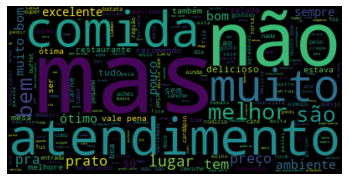

In [46]:
from wordcloud import WordCloud
text1 = " ".join(review for review in train_1['clean_review'])
wordcloud = WordCloud().generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

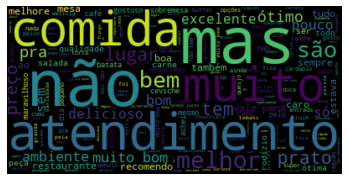

In [47]:
from wordcloud import WordCloud
text2 = " ".join(review for review in train_2['clean_review'])
wordcloud_2 = WordCloud().generate(text2)

plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

Em ambos os cenários as palavras que mais aparecem são:

* negativas: não, mas, atendimento, preço
* positivas: melhor, muito, bom, excelente

**Obs:**

As palavras negativas estão em maior destaque em ambos os cenários. Pode-se concluir que as palavras negativas têm um força/impacto maior nos reviews.

#### Análise por sentimento

In [48]:
# split df - positive, neutral and negative sentiment:
positive = train_1[train_1['rotulo'] == 1]
neutral = train_1[train_1['rotulo'] == 0]
negative = train_1[train_1['rotulo'] == -1]

In [49]:
# split df - positive and negative sentiment:
positive_2 = train_2[train_2['rotulo'] == 1]
negative_2 = train_2[train_2['rotulo'] == -1]

##### Wordcloud — Positive Sentiment

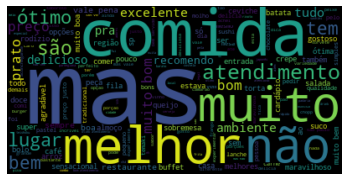

In [50]:
pos = " ".join(review for review in positive['clean_review'])

wordcloud2 = WordCloud().generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

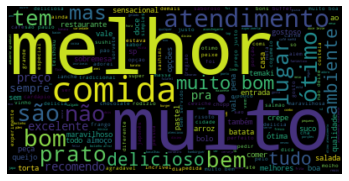

In [51]:
pos_2 = " ".join(review for review in positive_2['clean_review'])

wordcloud2 = WordCloud().generate(pos_2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


Palavras positivas com maior força:

* Cenário 1: Mas, comida, melhor, muito
* Cenário 2: Melhor, muito, bom, ótimo

**Obs**
* No cenário 1 algumas palavras negativas aparecem com bastante força

##### Wordcloud — Negative Sentiment

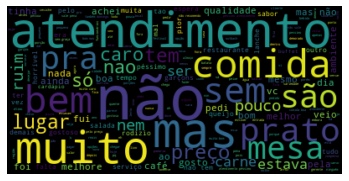

In [52]:
neg = " ".join(review for review in negative['clean_review'])

wordcloud3 = WordCloud().generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

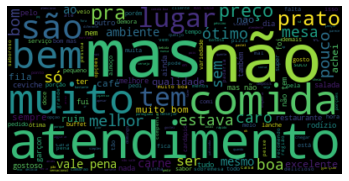

In [53]:
neg_2 = " ".join(review for review in negative_2['clean_review'])

wordcloud3 = WordCloud().generate(neg_2)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

Palavras negativas com maior força:

* Cenário 1: mas, não, prato, atendimento
* Cenário 2: mas, não, preço, atentimento

##### Wordcloud — Neuter Sentiment

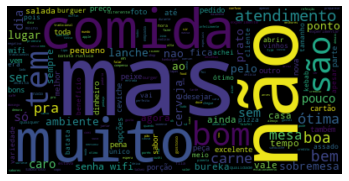

In [54]:
neut = " ".join(review for review in neutral['clean_review'])

wordcloud4 = WordCloud().generate(neut)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

Palavras neutras com maior força:

* Cenário 1: mas, não, muito, comida

**Obs Gerais**

* A palavra muito pode ser trick pois também aparece com forte impacto em reviews negativos e neutros

### Tokenizer: Segmentação do texto em palavras

1. Segmenta o texto, ou seja, quebrar a string (texto) conforme um padrão em regex, no caso, quebrar por palavra.

2. Ngram - criar combinações do tokenizer anterior. No caso, ngram= 2 , combinações de 2 palavras. Ngram = 3 combinações de 3 palavras, etc.

**Cenário 2**

In [55]:
def to_token(df, review, sentiment):

    list_texts = list(df[review])
    rotulos = list(df[sentiment])

    list_words_array = []
    list_rotulos = []
    rep_txt = []
    token_list = []

    for i in range(len(list_texts)):

        if pd.isnull(i):
            list_words_array.append(list_texts[i])
            list_rotulos.append(rotulos[i])
            rep_txt.append(list_texts[i])
        else:
            ### splita o texto e salva em uma lista
            words_array = list_texts[i].split(' ')
            token_list.append(words_array)

        for w in words_array:
            rep_txt.append(list_texts[i])
            list_rotulos.append(rotulos[i])
            list_words_array.append(w)
    
    df_tokenizer = pd.DataFrame()

    df_tokenizer['review'] = rep_txt
    df_tokenizer['sentiment'] = list_rotulos
    df_tokenizer['word'] = list_words_array

    return df_tokenizer

**Tokenizer Cenário 1**

In [56]:
df_tokenizer_1 = to_token(train_1, 'clean_review', 'rotulo')

print(df_tokenizer_1.shape)

df_tokenizer_1.head()

(23288, 3)


,review,sentiment,word
0,comida deliciosa mas pedi limonada suiça disse...,-1.0,comida
1,comida deliciosa mas pedi limonada suiça disse...,-1.0,deliciosa
2,comida deliciosa mas pedi limonada suiça disse...,-1.0,mas
3,comida deliciosa mas pedi limonada suiça disse...,-1.0,pedi
4,comida deliciosa mas pedi limonada suiça disse...,-1.0,limonada


In [57]:
### joga fora duplicados e espaços
df_tokenizer_1 = df_tokenizer_1.drop_duplicates()
df_tokenizer_1 = df_tokenizer_1[(df_tokenizer_1['word'] != '')]

df_tokenizer_1.shape

(22557, 3)

In [58]:
# df_tokenizer_1.sort_values(by = 'word').head()

**Tokenizer Cenário 2**

In [59]:
df_tokenizer_2 = to_token(train_2, 'clean_review', 'rotulo')

print(df_tokenizer_2.shape)

df_tokenizer_2.head()

(24478, 3)


,review,sentiment,word
0,comida deliciosa mas pedi limonada suiça disse...,-1,comida
1,comida deliciosa mas pedi limonada suiça disse...,-1,deliciosa
2,comida deliciosa mas pedi limonada suiça disse...,-1,mas
3,comida deliciosa mas pedi limonada suiça disse...,-1,pedi
4,comida deliciosa mas pedi limonada suiça disse...,-1,limonada


In [60]:
### joga fora duplicados e espaços
df_tokenizer_2 = df_tokenizer_2.drop_duplicates()
df_tokenizer_2 = df_tokenizer_2[(df_tokenizer_2['word'] != '')]

df_tokenizer_2.shape

(23670, 3)

### Calcula frequência de palavras

#### Cenário 1

In [61]:
df_freq_1 = df_tokenizer_1.groupby(['word', 'sentiment'], as_index = False).agg({'review':'count'})

print(df_freq_1.shape)
df_freq_1.sort_values(by = 'review', ascending = False).head()

(6859, 3)


,word,sentiment,review
4185,muito,1.0,279
3901,mas,1.0,206
494,atendimento,1.0,197
776,bom,1.0,196
4371,não,1.0,175


In [62]:
df_freq_table_1 = pd.pivot_table(df_freq_1,index=["word"],values=["review"], fill_value=0,
                               columns=["sentiment"], aggfunc=[np.mean])

df_freq_table_1 = df_freq_table_1.rename(columns = {-1.0:'negative', 1.0:'positive', 0.0:'neutral'})
df_freq_table_1.columns = df_freq_table_1.columns.map('_'.join)

In [63]:
df_freq_table_1 = df_freq_table_1.rename(columns = {'mean_review_negative':'qt_negative',
                                      'mean_review_neutral': 'qt_neutral',
                                     'mean_review_positive':'qt_positive'}).reset_index()

df_freq_table_1.head()

,word,qt_negative,qt_neutral,qt_positive
0,abacate,0,0,1
1,abacaxi,0,1,4
2,abençoado,0,0,1
3,aberta,0,0,1
4,aberto,1,1,2


##### Distribuição das frequências

In [64]:
%matplotlib inline
import seaborn as sns

**Palavras Negativas**

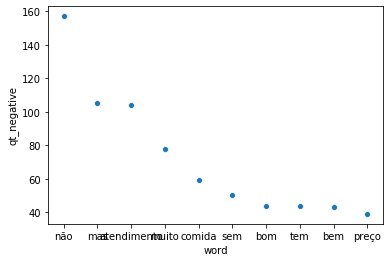

In [65]:
neg_plot_1 = df_freq_table_1.sort_values(by = 'qt_negative', ascending = False)
sns.scatterplot(x="word", y="qt_negative", data=neg_plot_1.head(10))

**Palavras Positivas**

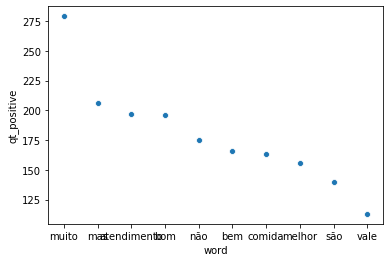

In [66]:
pos_plot_1 = df_freq_table_1.sort_values(by = 'qt_positive', ascending = False)
sns.scatterplot(x="word", y="qt_positive", data=pos_plot_1.head(10))

**Palavras Neutras**

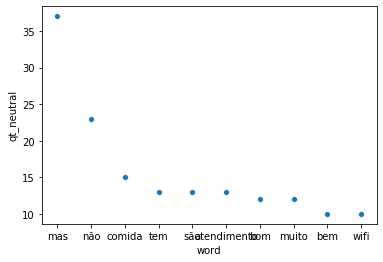

In [67]:
neutral_plot = df_freq_table_1.sort_values(by = 'qt_neutral', ascending = False)
sns.scatterplot(x="word", y="qt_neutral", data=neutral_plot.head(10))

#### Cenário 2

In [68]:
df_freq_2 = df_tokenizer_2.groupby(['word', 'sentiment'], as_index = False).agg({'review':'count'})

print(df_freq_2.shape)
df_freq_2.sort_values(by = 'review', ascending = False).head()

(6700, 3)


,word,sentiment,review
3848,mas,-1,295
4304,não,-1,285
490,atendimento,-1,200
4119,muito,1,192
4118,muito,-1,191


In [69]:
df_freq_table_2 = pd.pivot_table(df_freq_2,index=["word"],values=["review"], fill_value=0,
                               columns=["sentiment"], aggfunc=[np.mean])

df_freq_table_2 = df_freq_table_2.rename(columns = {-1.0:'negative', 1.0:'positive'})
df_freq_table_2.columns = df_freq_table_2.columns.map('_'.join)

df_freq_table_2 = df_freq_table_2.rename(columns = {'mean_review_negative':'qt_negative',
                                     'mean_review_positive':'qt_positive'}).reset_index()

df_freq_table_2.head()

,word,qt_negative,qt_positive
0,abacate,0,1
1,abacaxi,2,2
2,abençoado,0,1
3,aberta,0,1
4,aberto,3,1


##### Distribuição das frequências

**Palavras Negativas**

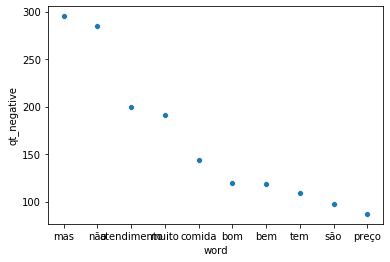

In [70]:
neg_plot_2 = df_freq_table_2.sort_values(by = 'qt_negative', ascending = False)
sns.scatterplot(x="word", y="qt_negative", data=neg_plot_2.head(10))

**Palavras Positivas**

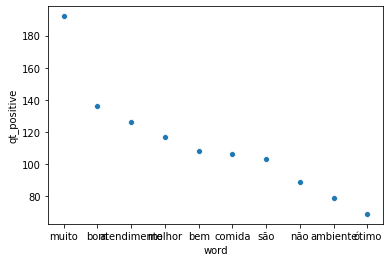

In [71]:
pos_plot_2 = df_freq_table_2.sort_values(by = 'qt_positive', ascending = False)
sns.scatterplot(x="word", y="qt_positive", data=pos_plot_2.head(10))

**Obs Gerais**

* Nos dois cenários as 5 palavras negativas mais frequentes são: Mas, não, atendimento, muito, comida.
* Mas, não,  atendimento, comida tb estão entre as 4 palavras mais comuns entre os revies neutros
* não mas e atentimento tb aparecem com alta frequência em reviews positivas

### Construindo o modelo 

#### Define Tokenizer

In [72]:
def my_tokenizer(s): 

    """ [Tokenizer definido com a finalidade de separar o texto em vetor de palavras.]"""
    
    return s.split(' ')

#### Vectorizer

Será usada a função CountVectorizer e TfidfVectorizer ambos da biblioteca Scikit-learn
* Modelo para conversão de palavras em vetores de números

Argumentos:

* tokenizer: Substitui o step de tokenização realizado.
* lowercase (default = True): Também substitiu o processo de tratamento feito anteriormente
* stop_words (defalt = None): Basta inserir a lista de stopword definida e também substitui este step no tratamento dos dados.
* ngram_range (default = range(1, 1) monogram): definir o range de tamanho de ngram desejado.
* max_features: Define o número de palavras a serem consideradas. Por exemplo, se max_features=1000 segnifica que apenas devem ser consideradas as 1000 palavras mais comuns.
* strip_accents: Remova os acentos e execute outra normalização de caractere durante a etapa de pré-processamento. (ascii, unicode)

In [73]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

**Bag of words (BOW)**

* Neste método o texto na coluna review será transformado em uma "cesta de palavras" contendo uma matriz esparsa de números inteiros. 
* Essa conversão é necessária pois os modelos não conseguem interpretar variáveis em forma de texto.

*obs: Esse modelo para análise é limitado pois apenas o número de vezes que uma palavra se repete (não considera as outras palavras)*

In [74]:
### Train dataset 1 with 3 classifications: positive, negative and neuter
train1 = train_1[['clean_review', 'rotulo']]
train1 = train1.rename(columns = {'stemmer_review':'review', 'clean_review':'review', 
                                'rotulo':'sentiment'})
train1.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1.0
1,partir desta sexta feira dia começam abrir jan...,0.0
2,joint burguer brewdog,0.0
3,agora segunda sexta habanero vai abrir almoço ...,0.0
4,experimente drink dona diabla muito bom,1.0


In [75]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', tokenizer=my_tokenizer, 
                            strip_accents='ascii')
vectorizer.fit(train1['review'])

X_train_matrix_1 = vectorizer.transform(train1['review'])
y_train_1 = train1['sentiment']

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [76]:
# print(vectorizer.vocabulary_)

In [77]:
test = pd.DataFrame(X_train_matrix_1.toarray()[0])
test['teste'] = 1

test.groupby(0, as_index = False).agg({'teste':'sum'})

,0,teste
0,0,4835
1,1,19


Aqui neste caso o valor de cada palavra na matriz será o número de vezes em que ela aparece no documento.

##### TF-IDF: term frequency-inverse document frequency

* É um fator de peso usado em vez de uma representação binária ou contagem de palavras.
* Tem o objetivo de representar o número de vezes que uma palavras aparece em um review relativo ao número de reviews que a mesma palavra aparece.
* Palavras que aparecem em mais documentos têm o valor mais próximo de zero e palavras que aparecem menos têm valores mais próximo de 1.

**ex:**
    
TF:
* Frequencia de vezes que termo aparece
* Se a palavra aparece 2 vezes em um review com 10 palavras
    
    TF = 2/10 = 0.2

IDF: 
* Representa o quão comum uma palavras é entre todos os documentos
* Se uma palavra aparece 10 vezes entre todos os reviews, sendo que há um total de 40 reviews

    IDF = log(10/40) = -1.386
    
por fim, o tf-idf é formado por tf.idf

*Obs:* Sklearn add 1 no númerador e no denominador para evitar divisões 0 por 0.

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
### Train dataset 1 with 3 classifications: positive, negative and neuter
train1 = train_1[['clean_review', 'rotulo']]
train1 = train1.rename(columns = {'stemmer_review':'review', 'clean_review':'review', 
                                'rotulo':'sentiment'})
train1.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1.0
1,partir desta sexta feira dia começam abrir jan...,0.0
2,joint burguer brewdog,0.0
3,agora segunda sexta habanero vai abrir almoço ...,0.0
4,experimente drink dona diabla muito bom,1.0


In [80]:
tfidf_vectorizer = TfidfVectorizer(binary=True,tokenizer=my_tokenizer, strip_accents='unicode',
                                   ngram_range=(1, 1), max_features=1000)

tfidf_vectorizer.fit(train1['review'])

X_train_matrix_tfidf = tfidf_vectorizer.transform(train1['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [81]:
tfidf_vectorizer

TfidfVectorizer(binary=True, max_features=1000, strip_accents='unicode',
                tokenizer=<function my_tokenizer at 0x000001D3C9CED3A8>)

In [82]:
# print(tfidf_vectorizer.idf_)

In [83]:
# train1['review'][0]

In [84]:
teste = pd.DataFrame(X_train_matrix_tfidf.toarray()[0])
teste['teste'] = 1

print("Exemplo:")
teste.groupby(0, as_index = False).agg({'teste':'sum'})

Exemplo:


,0,teste
0,0.000000,986
1,0.127267,1
2,0.130213,1
3,0.149518,1
4,0.243383,1
5,0.255669,1
6,0.263153,1
7,0.271946,1
8,0.282602,2
9,0.304554,1


#### Word2vec

In [85]:
# !pip install gensim==2.0.0

In [86]:
# from gensim.models import KeyedVectors

In [87]:
# model = KeyedVectors.load_word2vec_format('cbow_s50.txt')

### Primeiro modelo testado: Logistic Regression - Cenário 1

* Fácil de interpretar
* Tendem a ter uma boa performance com datasets esparços 
* Aprendizagem rápida 

**Detalhes**
* O Primero modelo testado é uma regressão lógistica
* Os dados foram tratados.
* Foi aplicada técnica TF-IDF, com tokenização por palavra, ngram de 1 unidade e resposta binária.

In [88]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [89]:
### Train dataset 1 with 3 classifications: positive, negative and neuter
train1 = train_1[['clean_review', 'rotulo']]
train1 = train1.rename(columns = {'stemmer_review':'review', 'clean_review':'review', 
                                'rotulo':'sentiment'})
train1.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1.0
1,partir desta sexta feira dia começam abrir jan...,0.0
2,joint burguer brewdog,0.0
3,agora segunda sexta habanero vai abrir almoço ...,0.0
4,experimente drink dona diabla muito bom,1.0


In [90]:
tfidf_vectorizer = TfidfVectorizer(binary=False, tokenizer=my_tokenizer, strip_accents='unicode',
                                   ngram_range=(1, 1), max_features=None)

tfidf_vectorizer.fit(train1['review'])

X_train_matrix_rl = tfidf_vectorizer.transform(train1['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



**Balanceamento da Amostra**

In [91]:
# from imblearn.over_sampling import SMOTE

In [92]:
# sm = SMOTE(random_state=0)

# y_train = train1['sentiment']
# X_train_res, y_train_res = sm.fit_sample(X_train_matrix_rl, y_train)

In [93]:
X = X_train_matrix_rl
y = train1['sentiment']

### separa a base de treino em 75% treino e 25% validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, random_state=123
)

#### Para simplificar apenas avaliarei o hyperparametro C 
### pois é o que ajusta a regularização do modelo
param_grids = {
                'C': [0.01, 0.05, 0.25, 0.5, 1]
             }


reglog_cv = GridSearchCV(LogisticRegression(random_state = 0), 
                         param_grids, 
                         cv=None,
                         verbose=1)

In [94]:
### fit cross validation model on train data
reglog_cv.fit(X_train,y_train)

print('Best Score: {0}'.format(reglog_cv.best_score_))
print('Best param: {0}'.format(reglog_cv.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 0.7429118419021152
Best param: {'C': 1}


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.4s finished


In [95]:
### Reglog com o Melhor C

reglog = LogisticRegression(C=1, random_state = 0)

In [96]:
reglog.fit(X_train, y_train)

### make predicitons
rl_predictions = reglog.predict(X_val)

In [97]:
print("Acurácia:", round(accuracy_score(y_val, rl_predictions), 2))

Acurácia: 0.78


**Métricas para avaliação do modelo  de Regressão Logística**


In [98]:
reglog.classes_

array([-1.,  0.,  1.])

In [99]:
# accuracy, precision, recall:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(rl_predictions, y_val)

array([[ 42,   3,   3],
       [  0,   2,   0],
       [ 61,  25, 289]], dtype=int64)

In [100]:
print(classification_report(rl_predictions,y_val))

              precision    recall  f1-score   support

        -1.0       0.41      0.88      0.56        48
         0.0       0.07      1.00      0.12         2
         1.0       0.99      0.77      0.87       375

    accuracy                           0.78       425
   macro avg       0.49      0.88      0.52       425
weighted avg       0.92      0.78      0.83       425



#### Coefiente das Features

In [101]:
feature_to_coef = {
    word: coef for word, coef in zip(
        tfidf_vectorizer.get_feature_names(), reglog.coef_[0]
    )
}

In [102]:
print("5 Features mais positivas\n")

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

5 Features mais positivas

('nao', 2.8479630931233313)
('pessimo', 2.0624365279212187)
('nem', 1.1503547328994976)
('caro', 1.0823563161842233)
('ruim', 1.0458654112343166)


In [103]:
print("5 Features mais negativas\n")

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1],
    reverse=False)[:5]:
    print (best_negative)

5 Features mais negativas

('excelente', -1.4556032519877633)
('otimo', -1.2817672339767785)
('melhor', -0.9290300070692653)
('otima', -0.9084490510560963)
('delicia', -0.8510753592945822)


### SVM - Support Vector Machine - Cenário 1

In [104]:
### Train dataset 2 with 3 classifications: positive, negative and neuter
train_1_svm = train_1[['clean_review', 'rotulo']]
train_1_svm = train_1_svm.rename(columns = {'stemmer_review':'review', 'clean_review':'review',
                                'rotulo':'sentiment'})
train_1_svm.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1.0
1,partir desta sexta feira dia começam abrir jan...,0.0
2,joint burguer brewdog,0.0
3,agora segunda sexta habanero vai abrir almoço ...,0.0
4,experimente drink dona diabla muito bom,1.0


In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

tfidf_vectorizer_svm = TfidfVectorizer(binary=False, tokenizer=my_tokenizer, strip_accents='unicode',
                                   ngram_range=(1, 1), max_features=None)
tfidf_vectorizer_svm.fit(train_1_svm['review'])

X_train_matrix_svm = tfidf_vectorizer_svm.transform(train_1_svm['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



**Balanceamento da amostra**

In [106]:
# sm = SMOTE(random_state=0)

# y_train_svm = train_1_svm['sentiment']
# X_train_res_svm, y_train_res_svm = sm.fit_sample(X_train_matrix_svm, y_train_svm)


# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

# y_train_svm = train_1_svm['sentiment']
# X_train_res_svm, y_train_res_svm = rus.fit_resample(X_train_matrix_svm, y_train_svm)

In [107]:
X = X_train_matrix_svm
y = train_1_svm['sentiment']

### Train test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, random_state=123
)

##loop no modelo para obter melhor C
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm_cv = LinearSVC(C=c, random_state=0)
    svm_cv.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm_cv.predict(X_val))))

Accuracy for C=0.01: 0.6870588235294117
Accuracy for C=0.05: 0.7035294117647058
Accuracy for C=0.25: 0.7858823529411765
Accuracy for C=0.5: 0.8070588235294117
Accuracy for C=1: 0.8141176470588235


In [108]:
### Melhor C aplicado

svm = LinearSVC(C=1, random_state=0)
svm.fit(X_train, y_train)


LinearSVC(C=1, random_state=0)

In [109]:
svm_predictions = svm.predict(X_val)

print("SVM Acurácia:", round(accuracy_score(y_val, svm_predictions), 2))

SVM Acurácia: 0.81


In [110]:
# accuracy, precision, recall:
confusion_matrix(svm_predictions, y_val)

array([[ 62,   6,   9],
       [  0,   3,   2],
       [ 41,  21, 281]], dtype=int64)

In [111]:
### make predicitons
print(classification_report(svm_predictions, y_val))

              precision    recall  f1-score   support

        -1.0       0.60      0.81      0.69        77
         0.0       0.10      0.60      0.17         5
         1.0       0.96      0.82      0.89       343

    accuracy                           0.81       425
   macro avg       0.55      0.74      0.58       425
weighted avg       0.89      0.81      0.84       425



**Obs:** SVM tem melhor resultados com reviews sem stemming

#### Coeficientes Features SVM

In [112]:
feature_to_coef_2 = {
    word: coef for word, coef in zip(
        tfidf_vectorizer_svm.get_feature_names(), svm.coef_[0]
    )
}

In [113]:
print("5 Features mais positivas\n")

for best_positive in sorted(
    feature_to_coef_2.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

5 Features mais positivas

('nao', 2.7613515074806876)
('pessimo', 2.0066006632084354)
('pior', 1.451593545770593)
('horrivel', 1.3435066110975182)
('nem', 1.179097885505221)


In [114]:
print("5 Features mais negativas\n")

for best_negative in sorted(
    feature_to_coef_2.items(), 
    key=lambda x: x[1],
    reverse=False)[:5]:
    print (best_negative)

5 Features mais negativas

('excelente', -1.7002780187461002)
('otimo', -1.606730799259289)
('delicia', -1.2518402052411166)
('justo', -1.204147953346905)
('melhor', -1.0547996961846764)


### Multinomial Naive Bayes - Cenário 1

* É um classificador muito usado e considerado adequado para classificação de texto

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [116]:
### Train dataset 2 with 3 classifications: positive, negative and neuter
train_1_mnb = train_1[['clean_review', 'rotulo']]
train_1_mnb = train_1_mnb.rename(columns = {'stemmer_review':'review', 'clean_review':'review',
                                'rotulo':'sentiment'})

In [117]:
tfidf_vectorizer_mnb = TfidfVectorizer(binary=False, tokenizer=my_tokenizer, strip_accents='unicode',
                                   ngram_range=(1, 1), max_features=None)

tfidf_vectorizer_mnb.fit(train_1_mnb['review'])

X_train_matrix_mnb = tfidf_vectorizer_mnb.transform(train_1_mnb['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



**Balanceamento da Amostra**

In [118]:
# sm = SMOTE(random_state=0)

# y_train_mnb = train_1_mnb['sentiment']
# X_train_res_mnb, y_train_res_mnb = sm.fit_sample(X_train_matrix_mnb, y_train_mnb)

In [119]:
X = X_train_matrix_mnb
y = train_1_mnb['sentiment']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, random_state=123
)

### alpha default = 1.0 (ajuste de Laplace)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [120]:
mnb_predictions = mnb.predict(X_val)

print("MNB Acurácia:", round(accuracy_score(y_val, mnb_predictions), 2))

MNB Acurácia: 0.72


In [121]:
confusion_matrix(mnb_predictions, y_val)

array([[ 14,   0,   1],
       [  0,   0,   0],
       [ 89,  30, 291]], dtype=int64)

In [122]:
### make predicitons
print(classification_report(mnb_predictions, y_val))

              precision    recall  f1-score   support

        -1.0       0.14      0.93      0.24        15
         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.71      0.83       410

    accuracy                           0.72       425
   macro avg       0.38      0.55      0.36       425
weighted avg       0.97      0.72      0.81       425



C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



#### Coeficientes features MNB

In [123]:
feature_to_coef_3 = {
    word: coef for word, coef in zip(
        tfidf_vectorizer_mnb.get_feature_names(), mnb.coef_[0]
    )
}

In [124]:
print("5 Features mais positivas\n")

for best_positive in sorted(
    feature_to_coef_3.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

5 Features mais positivas

('nao', -5.747232912352876)
('atendimento', -6.14520697975186)
('pessimo', -6.310100766736117)
('mas', -6.327158786913136)
('muito', -6.556576700839662)


In [125]:
print("5 Features mais negativas\n")

for best_negative in sorted(
    feature_to_coef_3.items(), 
    key=lambda x: x[1],
    reverse=False)[:5]:
    print (best_negative)

5 Features mais negativas

('abacate', -8.694472152857237)
('abacaxi', -8.694472152857237)
('abencoado', -8.694472152857237)
('aberta', -8.694472152857237)
('aberto', -8.694472152857237)


### Logistic Regression - Cenário 2

In [157]:
### Train dataset 1 with 3 classifications: positive, negative and neuter
train_2_rl = train_2[['clean_review', 'rotulo']]
train_2_rl = train_2_rl.rename(columns = {'stemmer_review':'review', 'clean_review':'review', 
                                'rotulo':'sentiment'})
train_2_rl.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1
1,partir desta sexta feira dia começam abrir jan...,-1
2,joint burguer brewdog,-1
3,agora segunda sexta habanero vai abrir almoço ...,-1
4,experimente drink dona diabla muito bom,-1


In [158]:
tfidf_vectorizer_rl2 = TfidfVectorizer(binary=False, tokenizer=my_tokenizer, strip_accents='unicode',
                                   ngram_range=(1,1), max_features=None)

tfidf_vectorizer_rl2.fit(train_2_rl['review'])

X_train_matrix_rl2 = tfidf_vectorizer_rl2.transform(train_2_rl['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [159]:
X = X_train_matrix_rl2
y = train_2_rl['sentiment']

In [160]:
### separa a base de treino em 75% treino e 25% validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, random_state=123
)

In [161]:
param_grids = {
                'C': [0.01, 0.05, 0.25, 0.5, 1]
             }


reglog_cv = GridSearchCV(LogisticRegression(random_state = 0), 
                         param_grids, 
                         cv=None,
                         verbose=1)

### fit cross validation model on train data
reglog_cv.fit(X_train,y_train)

print('Best Score: {0}'.format(reglog_cv.best_score_))
print('Best param: {0}'.format(reglog_cv.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 0.826436878713638
Best param: {'C': 1}


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [162]:
### Reglog com o Melhor C

reglog2 = LogisticRegression(C=1, random_state = 0)

reglog2

LogisticRegression(C=1, random_state=0)

In [163]:
reglog2.fit(X_train, y_train)

### make predicitons
rl_predictions2 = reglog2.predict(X_val)

**Métricas para Avaliação**

In [164]:
print("Acurácia:", round(accuracy_score(y_val, rl_predictions2), 2))

Acurácia: 0.86


In [165]:
confusion_matrix(rl_predictions2, y_val)

array([[183,  28],
       [ 32, 201]], dtype=int64)

In [166]:
print(classification_report(rl_predictions2,y_val))

              precision    recall  f1-score   support

          -1       0.85      0.87      0.86       211
           1       0.88      0.86      0.87       233

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.87      0.86      0.86       444



**Coeficientes das features**

In [136]:
feature_to_coef_rl2 = {
    word: coef for word, coef in zip(
        tfidf_vectorizer_rl2.get_feature_names(), reglog2.coef_[0]
    )
}

In [137]:
print("5 Features mais positivas\n")

for best_positive in sorted(
    feature_to_coef_rl2.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

5 Features mais positivas

('melhor', 1.5246094609289909)
('otimo', 1.4835868152906526)
('bom', 1.404702376560729)
('sensacional', 1.1783387667700258)
('muito', 1.1773991688381773)


In [138]:
print("5 Features mais negativas\n")

for best_negative in sorted(
    feature_to_coef_rl2.items(), 
    key=lambda x: x[1],
    reverse=False)[:5]:
    print (best_negative)

5 Features mais negativas

('mas', -4.562374866499741)
('nao', -4.25070706830679)
('caro', -2.1866399558379634)
('pessimo', -1.985139703922129)
('pouco', -1.5982698443367658)


### SVM - Cenário 2

In [139]:
### Train dataset 2 with 3 classifications: positive, negative and neuter
train_2_svm = train_2[['clean_review', 'rotulo']]
train_2_svm = train_2_svm.rename(columns = {'stemmer_review':'review', 'clean_review':'review',
                                'rotulo':'sentiment'})
train_2_svm.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1
1,partir desta sexta feira dia começam abrir jan...,-1
2,joint burguer brewdog,-1
3,agora segunda sexta habanero vai abrir almoço ...,-1
4,experimente drink dona diabla muito bom,-1


In [140]:
tfidf_vectorizer_svm2 = TfidfVectorizer(binary=False, tokenizer=my_tokenizer, strip_accents='unicode',
                                   ngram_range=(1, 1), max_features=None)
tfidf_vectorizer_svm2.fit(train_2_svm['review'])

X_train_matrix_svm2 = tfidf_vectorizer_svm2.transform(train_2_svm['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [141]:
X = X_train_matrix_svm2
y = train_2_svm['sentiment']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, random_state=123
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm_cv = LinearSVC(C=c, random_state=0)
    svm_cv.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm_cv.predict(X_val))))

Accuracy for C=0.01: 0.8468468468468469
Accuracy for C=0.05: 0.8693693693693694
Accuracy for C=0.25: 0.8603603603603603
Accuracy for C=0.5: 0.8603603603603603
Accuracy for C=1: 0.8581081081081081


In [142]:
### Melhor C aplicado
svm2 = LinearSVC(C=0.05, random_state=0)
svm2.fit(X_train, y_train)

svm_predictions2 = svm2.predict(X_val)

print("SVM Acurácia:", round(accuracy_score(y_val, svm_predictions2), 2))

SVM Acurácia: 0.87


In [143]:
# accuracy, precision, recall:
confusion_matrix(svm_predictions2, y_val)

array([[178,  21],
       [ 37, 208]], dtype=int64)

In [144]:
### make predicitons
print(classification_report(svm_predictions2, y_val))

              precision    recall  f1-score   support

          -1       0.83      0.89      0.86       199
           1       0.91      0.85      0.88       245

    accuracy                           0.87       444
   macro avg       0.87      0.87      0.87       444
weighted avg       0.87      0.87      0.87       444



**Coeficientes das features**

In [145]:
feature_to_coef_svm2 = {
    word: coef for word, coef in zip(
        tfidf_vectorizer_svm2.get_feature_names(), svm2.coef_[0]
    )
}

In [146]:
print("5 Features mais positivas\n")

for best_positive in sorted(
    feature_to_coef_svm2.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

5 Features mais positivas

('otimo', 0.4434382164576302)
('bom', 0.40117143257620963)
('excelente', 0.38665405343376197)
('melhor', 0.3828745997398041)
('recomendo', 0.34512745294062874)


In [147]:
print("5 Features mais negativas\n")

for best_negative in sorted(
    feature_to_coef_svm2.items(), 
    key=lambda x: x[1],
    reverse=False)[:5]:
    print (best_negative)

5 Features mais negativas

('mas', -1.322378150687258)
('nao', -1.2903924884761127)
('caro', -0.5907403878130731)
('pessimo', -0.532834440674006)
('pouco', -0.4580270395221895)


### Muiltinomial Naive Bayes - Cenário 2

In [148]:
### Train dataset 2 with 2 classifications: positive and negative
train_2_mnb = train_2[['clean_review', 'rotulo']]

train_2_mnb = train_2_mnb.rename(columns = {'stemmer_review':'review', 'clean_review':'review',
                                'rotulo':'sentiment'})

train_2_mnb.head()

,review,sentiment
0,comida deliciosa mas pedi limonada suiça disse...,-1
1,partir desta sexta feira dia começam abrir jan...,-1
2,joint burguer brewdog,-1
3,agora segunda sexta habanero vai abrir almoço ...,-1
4,experimente drink dona diabla muito bom,-1


In [149]:
tfidf_vectorizer_mnb2 = TfidfVectorizer(binary=False, tokenizer=my_tokenizer, strip_accents=None,
                                   ngram_range=(1, 1), max_features=None)

tfidf_vectorizer_mnb2.fit(train_2_mnb['review'])

X_train_matrix_mnb2 = tfidf_vectorizer_mnb2.transform(train_2_mnb['review'])

C:\Users\maria.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [150]:
X = X_train_matrix_mnb2
y = train_2_mnb['sentiment']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.75, random_state=123
)

### alpha default = 1.0 (ajuste de Laplace)
mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)

MultinomialNB()

In [151]:
mnb_predictions2 = mnb2.predict(X_val)

print("MNB Acurácia:", round(accuracy_score(y_val, mnb_predictions2), 2))

MNB Acurácia: 0.84


In [152]:
confusion_matrix(mnb_predictions2, y_val)

array([[181,  38],
       [ 34, 191]], dtype=int64)

In [153]:
### make predicitons
print(classification_report(mnb_predictions2, y_val))

              precision    recall  f1-score   support

          -1       0.84      0.83      0.83       219
           1       0.83      0.85      0.84       225

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444



**Coeficientes das Features MNB 2**

In [154]:
feature_to_coef_mnb2 = {
    word: coef for word, coef in zip(
        tfidf_vectorizer_mnb2.get_feature_names(), mnb2.coef_[0]
    )
}

In [155]:
print("5 Features mais positivas\n")

for best_positive in sorted(
    feature_to_coef_mnb2.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

5 Features mais positivas

('muito', -5.764506863893885)
('bom', -5.833531980952875)
('melhor', -6.00673015819387)
('atendimento', -6.232455035204285)
('comida', -6.245000761948178)


In [156]:
print("5 Features mais negativas\n")

for best_negative in sorted(
    feature_to_coef_mnb2.items(), 
    key=lambda x: x[1],
    reverse=False)[:5]:
    print (best_negative)

5 Features mais negativas

('abençoado', -8.910349223606937)
('aberta', -8.910349223606937)
('aborrecimentos', -8.910349223606937)
('abre', -8.910349223606937)
('abrem', -8.910349223606937)


### Resultados - Cenário 1

![image](metrics_1.PNG)

### Resultados Cenários 2

![image](metrics_2.2.PNG)

### Próximos Passos

* Aplicar na bases de teste e analisar com os modelos estão classificando
* Explorar mais técnicas de tratamento de dados como Stemming e Lemmatization para o português.
* Técnicas para limpar erros de digitação e palavras escritas junto
* Explorar possibilidade de uso do word2vec em português.
* Modelagem não supervisionada baseada em léxico das palavras (português).